In [2]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import math

from pandas import read_csv
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import pylab

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [3]:
dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv')
dataframe
print(dataframe.shape)
print(dataframe.head())

(1272, 14)
  Steel     C    Si    Mn    Cr   Mo    Ni   Al    Cu  ppmB       Pa      Rc  \
0  GA01  0.13  0.27  0.22  0.08  0.0  0.06  0.0  0.22   0.0  1132.36  60.000   
1  GA01  0.13  0.27  0.22  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   8.500   
2  GA01  0.13  0.27  0.22  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   0.650   
3  GA01  0.13  0.27  0.21  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   0.050   
4  GA01  0.13  0.27  0.21  0.08  0.0  0.06  0.0  0.22   0.0  1132.36   0.004   

       lnRc  Texp  
0  4.094345   770  
1  2.140066   805  
2 -0.430783   825  
3 -2.995732   840  
4 -5.521461   855  


In [4]:
data = pd.DataFrame.values
x = dataframe.iloc[:, 1:-1]
y = dataframe.iloc[:, -1]


x=x.astype(float)
y=y.astype(float)

x

,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc
0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345
1,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066
2,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783
3,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732
4,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759
1268,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612
1269,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465
1270,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465


,VIF Factor,features
0,6.103772,C
1,2.679822,Si
2,4.702390,Mn
3,2.166472,Cr
4,1.911354,Mo
5,1.441319,Ni
6,1.087822,Al
7,1.269708,Cu
8,1.467676,ppmB
9,13.074450,Pa


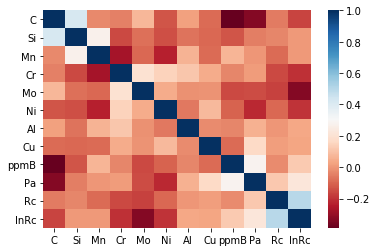

In [5]:
corr=x.corr()
#corr
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
#vif

xx=x.drop(['C', 'Pa'], axis = 1)
#xx
viff=pd.DataFrame()
viff["VIF Factor"] = [variance_inflation_factor(xx.values, i) for i in range(xx.shape[1])]
viff["features"] = xx.columns
viff
vif



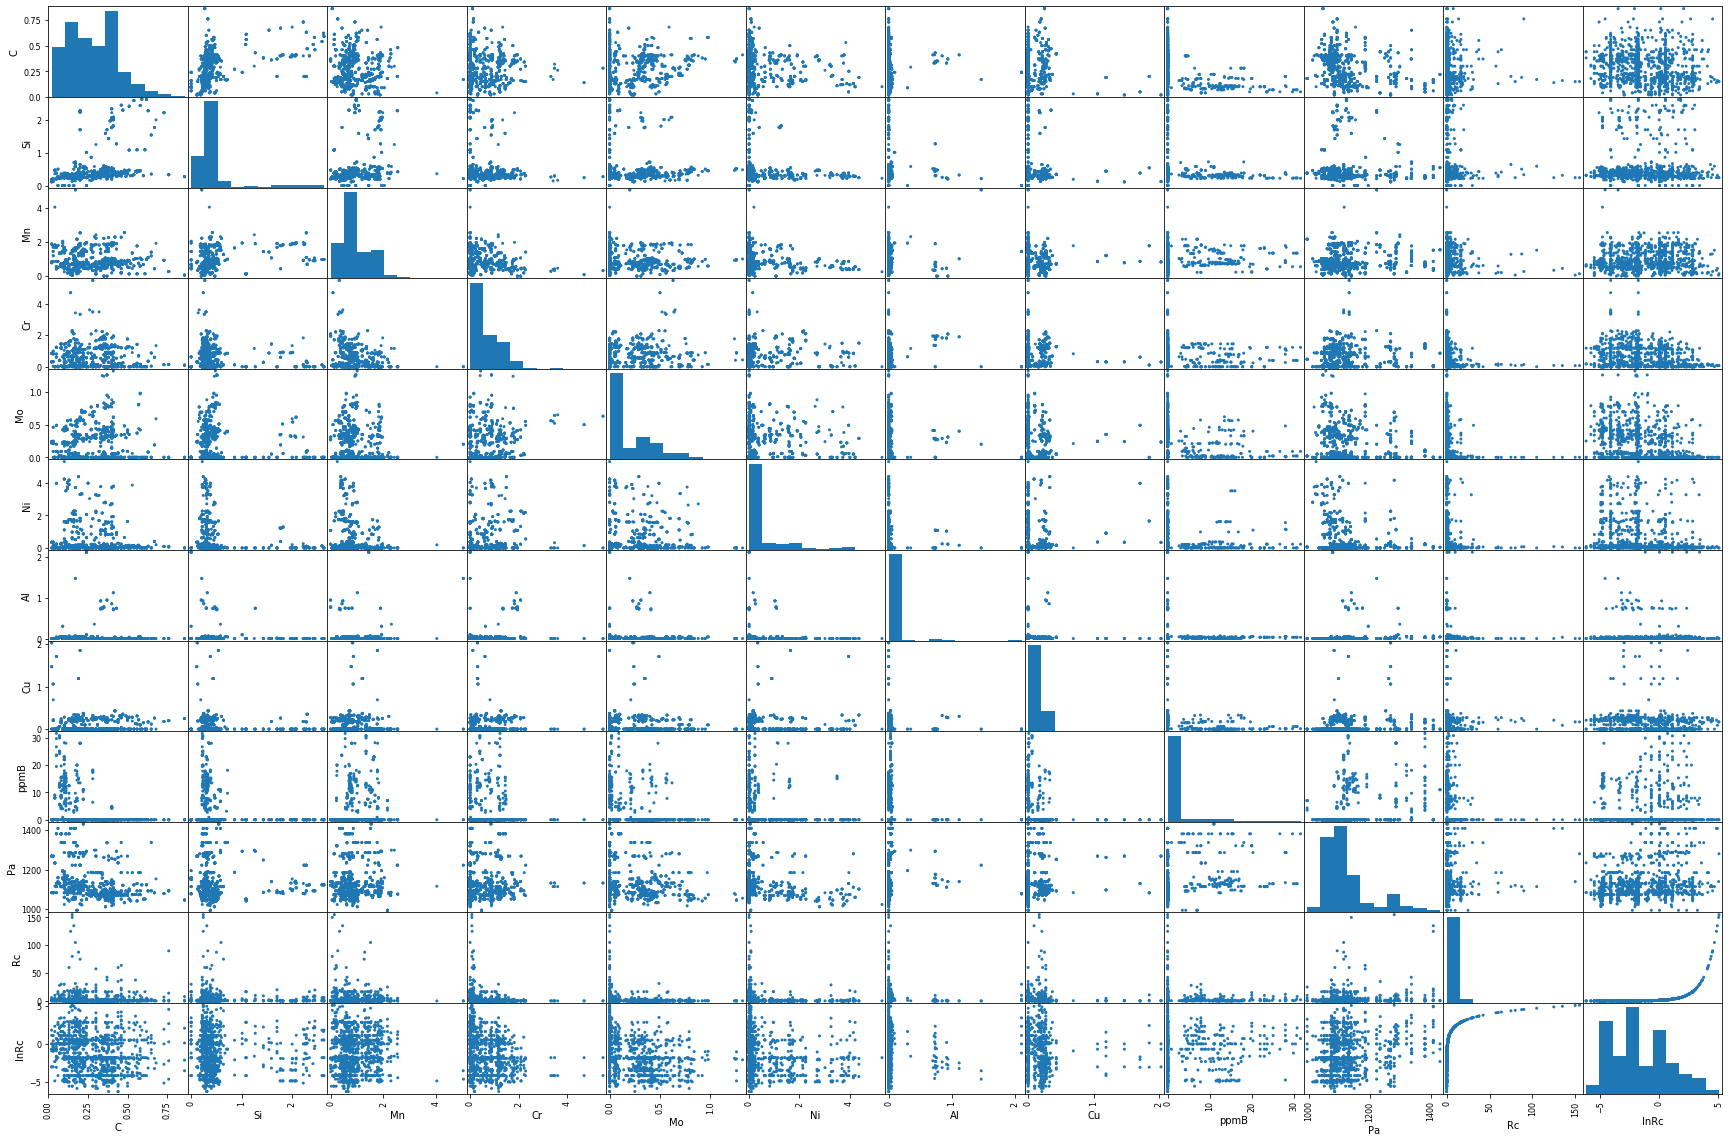

In [6]:
pd.plotting.scatter_matrix(x, alpha=1, figsize=(30, 20))
plt.show()

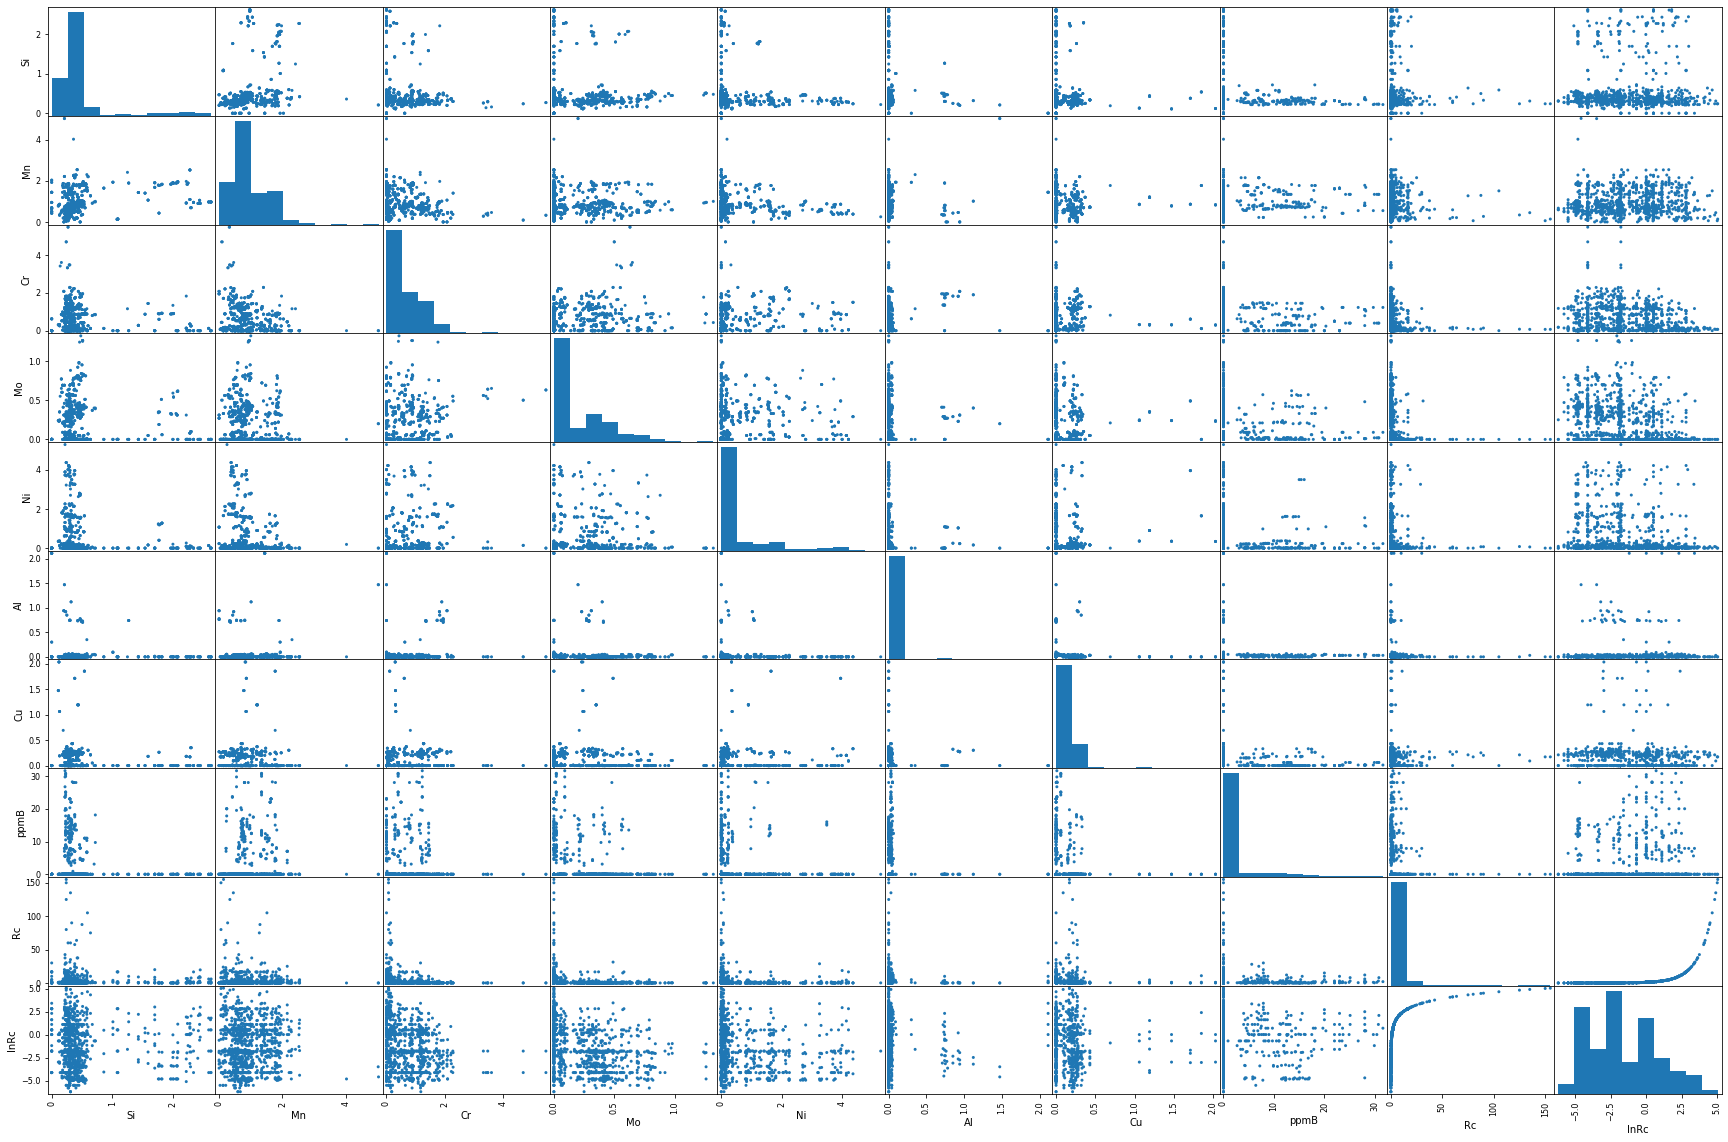

In [7]:
pd.plotting.scatter_matrix(xx, alpha=1, figsize=(30, 20))
plt.show()

In [8]:
x=dataframe.drop(['Texp','Steel'], axis = 1)
y=dataframe[['Texp']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
regression_model=LinearRegression()
regression_model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
intercept = regression_model.intercept_
coef=regression_model.coef_[0]

for cf in zip(x.columns, coef):
    print("The Coefficient for {} is {:2}".format(cf[0],cf[1]))

y_predict=regression_model.predict(x_test)
y_predict[:90]
 
dataframe
intercept

The Coefficient for C is -233.88644677704573
The Coefficient for Si is 20.776630696689526
The Coefficient for Mn is -39.535101853371884
The Coefficient for Cr is -10.706505667625503
The Coefficient for Mo is -14.980419008667308
The Coefficient for Ni is -31.96807220463212
The Coefficient for Al is 54.47036505402637
The Coefficient for Cu is -2.675234678594631
The Coefficient for ppmB is -0.41583830915272413
The Coefficient for Pa is -0.022354187697950258
The Coefficient for Rc is -0.38321056358395217
The Coefficient for lnRc is -7.919727783138825


array([859.31676742])

In [10]:
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
est = model.fit()
est.resid

#est.params, intercept

#x2.head()
#sum(est.resid)
#intercept

0       29.627752
1       28.295589
2       24.888021
3       19.088031
4       14.212561
          ...    
1267    34.508549
1268    47.837734
1269    56.777639
1270   -19.003356
1271   -15.863594
Length: 1272, dtype: float64

In [11]:
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)

if pval>0.05:
    print('For the whites test')
    print("the p-value was {:.4}").format(pval)
    print("we fail to reject the null hypothesis, so there is no heteroscedasticity, \n")

else:
    print('For the whites test')
    print("the p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, so there is heteroscedasticity, \n")
    

    
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)

if pval>0.05:
    print('For the whites test')
    print("the p-value was {:.4}").format(pval)
    print("we fail to reject the null hypothesis, so there is no heteroscedasticity, \n")

else:
    print('For the breuschpagan test')
    print("the p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, so there is heteroscedasticity, \n")

For the whites test
the p-value was 4.889e-120
we reject the null hypothesis, so there is heteroscedasticity, 

For the breuschpagan test
the p-value was 7.75e-33
we reject the null hypothesis, so there is heteroscedasticity, 



<function matplotlib.pyplot.show(*args, **kw)>

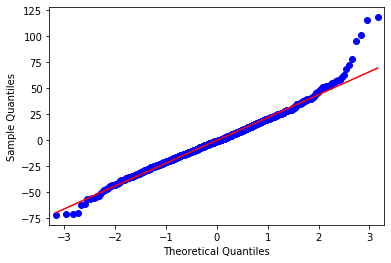

In [12]:
sm.qqplot(est.resid, line='s')
pylab.show

In [13]:
mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

3.5104118075004685e-11

In [14]:
model_mse=mean_squared_error(y_test, y_predict)
model_mae=mean_absolute_error(y_test, y_predict)
model_rmse=math.sqrt(model_mse)

model_mse, model_mae, model_rmse
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 526.0665782690932
MAE 17.722429205717923
RMSE 22.936141311674316


In [15]:
model_r2 = r2_score(y_test, y_predict)
model_r2

0.7839682223080925

In [16]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   Texp   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     371.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:15:25   Log-Likelihood:                -5736.2
No. Observations:                1272   AIC:                         1.150e+04
Df Residuals:                    1259   BIC:                         1.157e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        851.4297     10.424     81.681      0.0

In [17]:

# define model
model = Lasso(alpha=1.0)


In [18]:
# make a prediction with a lasso regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Lasso
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.998


In [19]:
reg = LinearRegression().fit(x, y)
y_predicted = reg.predict(x)


plt.plot(x, y, 'o', color='black');
plt.plot(x,y_predicted,color='blue')
plt.title("Actuals vs Regression Line")

ValueError: Found input variables with inconsistent numbers of samples: [1272, 506]

In [ ]:
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

